# Support Vector Regression

**Business Goal**: As an owner of **`MuShu Bike Rental CO.`** in New york. I want to know how many bicyles will be rented on any given day based on daily temprature, humidity and wndspeed. Can you help  **`MuShu Bike Rental CO.`**  to predict the number of daily rental. 

Let's solve this problem using SVR - *Support Vector Regression*.  
Before we begin, let's see the key terms that will be used. 
## Key terms
- **Kernel**
> A fancy word for function used to map a lower dimension data into higher dimension data.

- **Hyper Plane**
>This is line that help us predict the target values.

- **Boundary Line**
> There are two boundary lines which separates the classes. The support vectors can be __on__ the boundary line or __outside__ the boundary line.

- **Support Vectors**
> Support vectors are the data points which are closest to the boundary line.


## What is SVR  model?
In Simple/multiple regression we try to minimize the the errors while in SVR, we try to fit the error within a threshold.
> **Blue Line: Hyper Plane | Red Line: Boundary lines**
![random.PNG](resources/img/svr/random.PNG)

Looking at the above figure, our goal is have the data points **inside** the boundary lines and hyper plane with maximum number of data points.


### What is "Boundary again?
The red lines that you see in the digram above are called boundary lines. These lines are at equidistant from hyper plane (Blue line). So basiaccly, if one boundary line is at distance **"e"** distance from hyper plane the other would be at distnce of **"-e"**.
In mathematical eqation.
 If hyper plane line is staright line going through Y-AXIS and represnted as
  > mX + C =0  

 Then the equation of boundary lines can be represnted as 
> mX + C = e  
 mx +C = -e

 The final equation of SVR can be represnted as  
> e≤ y-mx-c ≤+e

> To summarize: The goal so far is to find the distance value **e** which is equidistant from `hyper plane` line with the maximum data points OR that they are inside the `Boundary line`.
![full-random.PNG](resources/img/svr/full-random.PNG)

### Exploring the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Import the datset
dataset = pd.read_csv('BikeRental/bike_rental_train.csv')


In [2]:
dataset.head()

,temp,humidity,windspeed,bike_rent_count
0,9.02,80,0.0000,40
1,9.02,80,0.0000,32
2,9.84,75,0.0000,13
3,9.84,75,0.0000,1
4,9.84,75,6.0032,1


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,9801.0,20.230348,7.791740,0.82,13.9400,20.500,26.2400,41.0000
humidity,9801.0,61.903989,19.293371,0.00,47.0000,62.000,78.0000,100.0000
windspeed,9801.0,12.836534,8.177168,0.00,7.0015,12.998,16.9979,56.9969
bike_rent_count,9801.0,191.334864,181.048534,1.00,42.0000,145.000,283.0000,977.0000


In [4]:
dataset.columns

Index(['temp', 'humidity', 'windspeed', 'bike_rent_count'], dtype='object')

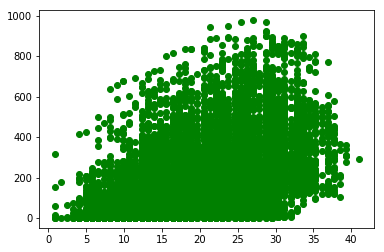

In [5]:
plt.scatter( dataset.temp, dataset.bike_rent_count, c='green');


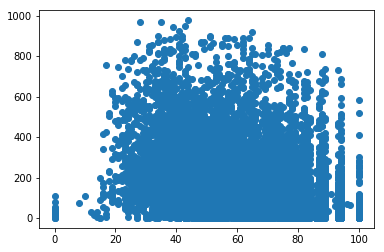

In [6]:
plt.scatter( dataset.humidity,dataset.bike_rent_count);


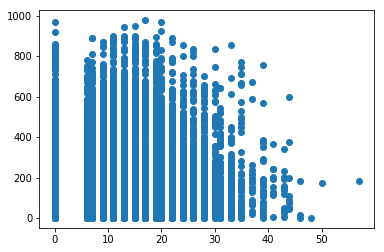

In [7]:
plt.scatter( dataset.windspeed, dataset.bike_rent_count);

> **Summary**  
Based on data description and histogram plot.
- Temp Range = 0 to 41
- Humidity Range = 0 to 100
- Windspeed = 0 to 57

In [8]:
dataset.corr(method='pearson', min_periods=1)

,temp,humidity,windspeed,bike_rent_count
temp,1.000000,-0.060524,-0.020792,0.393114
humidity,-0.060524,1.000000,-0.317602,-0.312835
windspeed,-0.020792,-0.317602,1.000000,0.096836
bike_rent_count,0.393114,-0.312835,0.096836,1.000000


> **Summary**  
- Looking at the coorelation matrix, we see that there is a positive relation between `temprature` and `bike_rent_count`
- `Humidity` has negative effect on `bike_rent_count`. Hgher the humidity, lower the number of rentals
- `Windspeed` has little effect on `bike_rent_count`.  
Looking at the correlation matrix, it confirms the visuals that bike count rental has weak correlation with all of the 3 variables. 

**What does weak correlation means?**
It means that the equation of model that we are going to plot is probably not going to give very accurate results. However, the goal of this post is to show you how to implement SVR. 

So Let's bring out our template from our [first post](http://www.javahabit.com/2019/01/21/part-1-ml-data-preprocessing/) on data pre processing.





> **Step 1**: Let's break the data into Dependent and Independent variable

In [9]:
### Break up in dependent and Independent variables
X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:, 3].values


> **Step 2** : Break the data into train and test set

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


> **Step 3**: Feature scaling. This step is required here beacause SVR library does not do feature scaling.

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)

> **Step 4**: Create a Regessor and fit the model

In [12]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR

# Create your regressor here
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In the above code we are using the `SVR` class for fitting the model. 
> SVR(
    ["kernel='rbf'", 'degree=3', "gamma='auto_deprecated'", 'coef0=0.0', 'tol=0.001', 'C=1.0', 'epsilon=0.1', 'shrinking=True', 'cache_size=200', 'verbose=False', 'max_iter=-1'],
)  

The SVR model that we are using provides 4 types of `Kernel` - rbf, linear, poly, sigmoid. In our case, we are using `linear` since data appears to be linear based on visusalizations. Another interesting attribute is `verbose`, which when set to true will show you the default values used of other attrinutes.

> **Step 5**: Predict the bike count based on test data


In [13]:
# Predicting a new result
y_pred = regressor.predict(X_test)

> **Step 6**: Check the model effeciency

In [14]:
print('Train Score: ', regressor.score(X_train, y_train))
print('Test Score: ', regressor.score(X_test, y_test))

Train Score:  0.19926232721567205
Test Score:  0.2082800818663224


As mentioned earlier, since the correlation is weak, we can see that our model is extremly weak. **One thing to note here is that I downloaded this random dataset from some website**. So when I was working on SVR, I was not sure if the data is true or not.

Let's try the tweaking SVR model a little to see if we can do better.


In [15]:
# Create your regressor here
regressor = (SVR(kernel='poly', 
                 shrinking=True, 
                  degree=7,
                gamma='scale',
                 epsilon = 0.01,
                 coef0 =1.60
                ))
regressor.fit(X_train,y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)

print('Train Score: ', regressor.score(X_train, y_train))
print('Test Score: ', regressor.score(X_test, y_test))


Train Score:  0.25167703525198526
Test Score:  0.2484248213345378


So after playing around with different option and values, you will see that if you use `poly` or polynomial kernel, I was able to get the model prediction upto **25.xx%**.